
# **Assignment 3: Convolutional Neural Networks - November 2024**



> - **Author:** Elio Gargiulo
- **ID:** 869184
- **Course:** Advanced Machine Learning
- **A.Y:** 2024/25
- **University:** Milano Bicocca - Master Degree in Computer Science




> Design and train a CNN with up to 7000 trainable parameters to obtain the best results on the MNIST dataset


## **Initialization**

> Importing the necessary libraries.

In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

# For consistent trainings
keras.utils.set_random_seed(42)

## **Preparing the Data**


#### **Preparing the Data: Inspecting the Dataset**

> Loading the data and then inspecting the data shapes to see if the data has been correctly loaded. In this case the MNIST dataset can be loaded directly using keras.

In [ ]:
# Importing the data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Printing the shapes
print("X_Train shapes: " , x_train.shape)
print("Y_Train shapes: ", y_train.shape)
print("X_Test shapes: ", x_test.shape)
print("Y_Test shapes: ", y_test.shape)

X_Train shapes:  (60000, 28, 28)
Y_Train shapes:  (60000,)
X_Test shapes:  (10000, 28, 28)
Y_Test shapes:  (10000,)


> Plotting an image for reference

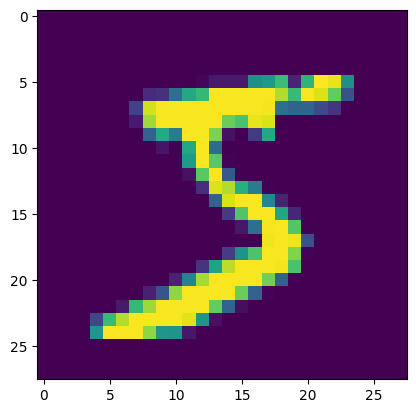

Label: 5


In [ ]:
# Plotting an image, in this case the first label will be 5
plt.imshow(x_train[0])
plt.show()
print(f"Label: {y_train[0]}")

#### **Preparing the Data: Normalization and Encoding**

> Normalization of the values from pixel range [0, 255] to [0,1] as this will help the CNN work better by improving training stability, accelerating convergence, and optimizing interactions with activation functions. Also for compatibility the grayscale channel will be added to the shape.

In [ ]:
# Normalization
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Adding the grayscale channel for compatibility with CNNs
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Printing the new shapes
print("Train Shape: ", x_train.shape)
print("Test Shape: ", x_test.shape)

Train Shape:  (60000, 28, 28, 1)
Test Shape:  (10000, 28, 28, 1)


> One-hot encoding for categorical crossentropy.

In [ ]:
# One-hot encoding of our classes
num_classes = 10

# Casting to categorical
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Printing the label 5
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


> We can see that now the number 1 is position 6 (0 to 9).

## **CNNs seen in Laboratory**

> This sections will be used as a reference for the next CNNs that will be implemented to fulfil the task. The metrics shown in class will be used as a comparasion between a CNN with around 35k and a CNN with less than 7k parameters.

### **CNNs seen in Laboratory - The Main Reference**

In [ ]:
# CNN with 34826 parameters
input_shape = (28, 28, 1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        # Default stride = 1
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        # Default pool_size is 2x2
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        # Flattening for Dense layer
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
# Model Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fixed parameters for training
batch_size = 128
epochs = 15

# Compiling the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# History for training results
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7502 - loss: 0.8371 - val_accuracy: 0.9718 - val_loss: 0.1011
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9609 - loss: 0.1299 - val_accuracy: 0.9810 - val_loss: 0.0683
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9719 - loss: 0.0931 - val_accuracy: 0.9845 - val_loss: 0.0552
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9765 - loss: 0.0771 - val_accuracy: 0.9858 - val_loss: 0.0502
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9792 - loss: 0.0679 - val_accuracy: 0.9871 - val_loss: 0.0446
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9821 - loss: 0.0595 - val_accuracy: 0.9881 - val_loss: 0.0411
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9826 - loss: 0.0560 - val_accuracy: 0.9882 - val_loss: 0.0385
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9844 - loss: 0.0474 - val_accuracy: 0.

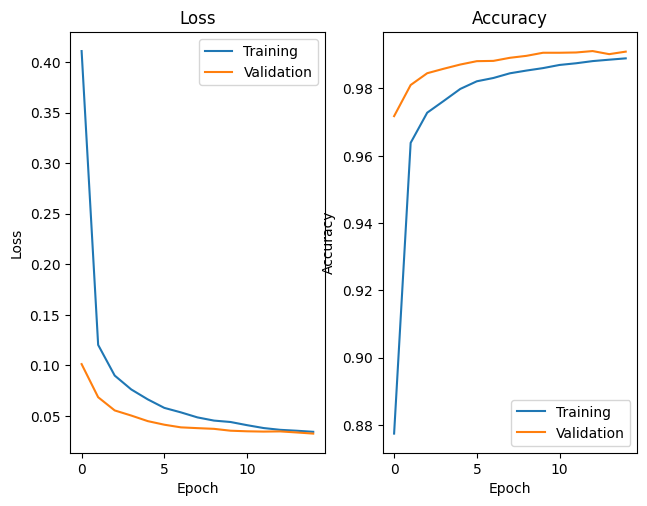

In [ ]:
# Plotting the results
def plot_performance(history):
  fig, ax = plt.subplots(1, 2)
  # Plot training & validation accuracy values
  fig.tight_layout()
  train_acc = history.history['accuracy']
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  val_acc = history.history['val_accuracy']
  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Loss')
  ax[0].set_title('Loss')
  ax[0].plot(train_loss, label='Training')
  ax[0].plot(val_loss, label='Validation')
  ax[0].legend()
  ax[1].set_xlabel('Epoch')
  ax[1].set_ylabel('Accuracy')
  ax[1].set_title('Accuracy')
  ax[1].plot(train_acc, label='Training')
  ax[1].plot(val_acc, label='Validation')
  ax[1].legend()
  plt.show()

plot_performance(history)

> We can see how both graphs show already a good fit for the model, without any overfitting and very good performance.

In [ ]:
# Evaluating the model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02589333802461624
Test accuracy: 0.9911999702453613


> These performance will be used for the comparation with the other CNNs.

### **CNNs seen in Laboratory - Smallest**

In [ ]:
# Smallest CNN
model_smallest = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        # Only a Max Pooling2D
        layers.MaxPooling2D(pool_size=(28, 28)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
# Model summary
model_smallest.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              20 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compiling the model
model_smallest.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# History of the training
history_smallest = model_smallest.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0964 - loss: 2.3498 - val_accuracy: 0.0989 - val_loss: 2.3052
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1090 - loss: 2.3033 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3009 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.

In [ ]:
score = model_smallest.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.3011972904205322
Test accuracy: 0.11349999904632568


> With just a MaxPooling2D layer the performance is very bad and model probably does just random guesses.

## **Building the CNNs**

> This section focuses on finding the best-performing CNN for the task. The approach begins with a baseline solution, which is progressively refined and improved through successive enhancements to reach an optimal outcome.

> To simplify the tests, the models will be trained using the exact same parameters, so 15 epochs, 128 batch_size and 0.2 validation split. For the learning rate, the default one seems to converge very quickly in the CNNs above, making it a great choice.

In [ ]:
# Function for plotting accuracy and loss of NNs
def plot_performance(history):
  fig, ax = plt.subplots(1, 2)
  # Plot training & validation accuracy values
  fig.tight_layout()
  train_acc = history.history['accuracy']
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  val_acc = history.history['val_accuracy']
  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Loss')
  ax[0].set_title('Loss')
  ax[0].plot(train_loss, label='Training')
  ax[0].plot(val_loss, label='Validation')
  ax[0].legend()
  ax[1].set_xlabel('Epoch')
  ax[1].set_ylabel('Accuracy')
  ax[1].set_title('Accuracy')
  ax[1].plot(train_acc, label='Training')
  ax[1].plot(val_acc, label='Validation')
  ax[1].legend()
  plt.show()

### **Building the CNNs: CNN 1 - 5258 Parameters - Baseline**

> This model is built following the one presented in class, so the structure matches the main reference (34826 parameters). The first approach (baseline) is to simply alter the values of the filters to reduce the amount of parameters below 7k.

> In this case, the value of the filters has been reduces following an incremental approach, starting from 8, then 16. This will bring the total trainable parameters to 5268, which is an allowed starting point while also not reducing much the amount of filters.

In [ ]:
# Setting up the input shape
input_shape = (28, 28, 1)
model_cnn_1 = keras.Sequential(
    [
        # Input layer
        keras.Input(shape=input_shape),
        # First Convolutional Layer with 8 filters 3x3, Pooling 2x2
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        # Second Convolutional Layer with 16 filters 3x3, Pooling 2x2
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        # Flatten for the Dense Layer
        layers.Flatten(),
        # Regularization with Dropout with the default value of 0.5
        layers.Dropout(0.5),
        # Dense Output Layer
        layers.Dense(num_classes, activation="softmax"),
    ]
)
# Showing the model summary (for parameters)
model_cnn_1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           4,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,258 (20.54 KB)

 Trainable params: 5,258 (20.54 KB)

 Non-trainable params: 0 (0.00 B)

#### **Output Shape Calculations**

> The Output Shapes are obtained following these rules:
>  - For **Conv2D layers**, the output size depends on the input size, the filter (kernel) size, padding (default value which is 0), and stride (our case it's the default one, so 1). The formula is the following:

> $$
\text{Output Dim} = \frac{\text{Input Dim} - \text{Kernel Size} + 2 \cdot \text{Padding}}{\text{Stride}} + 1
$$

 > - For **MaxPooling2D** layers, the size is reduced based on the pool size. For example, if the pool size is 2x2 (in our case), the output height and width are halved, while the depth stays the same. The formula is the following:

> $$
\text{Output Dim} = \left\lfloor \frac{\text{Input Dim} + 2 \times \text{Padding} - \text{Pool Size}}{\text{Stride}} \right\rfloor + 1
$$

 > - For the Flatten layer, all the dimensions are combined into a single long vector, reshaping the data for the next Dense layer.

 > - For Dense layers, the output size matches the number of neurons in the layer, as it operates on the flattened input.


> For example the first **Conv2D** and **MaxPooling2D** Layers are obtaned using the above formulas (padding = 0, stride = 1, kernel_size = 3x3, pool_size = 2x2):

> - $$
\text{Output Conv2D} = \frac{28 - 3 + 2 \cdot 0}{1} + 1 = 26,
\text{Output Shape} = (26, 26, 8)
$$

> - $$
\text{Output MaxPooling2D} = \frac{26}{2} = 13,
\text{Output Shape} = (13, 13, 8)
$$

#### **Total Parameters Calculations**

> For obtaining the total number of parameters the following formulas will be used:

> -
For **Conv2D Layers**:

>$$
\text{Parameters} = (\text{Kernel Height} \cdot \text{Kernel Width} \cdot \text{Input Channels} + 1 (Bias)) \cdot \text{Filters}
$$

> -
For **Dense Layers**:

>$$
\text{Parameters} = (\text{Input Neurons} + 1) \cdot \text{Output Neurons}
$$

> We can see how the amount of filters, the kernel size (width and heigth) and especially the amount of input neurons obtained from flatten, impact the amount of total parameters. Also **MaxPooling2D** and **Flatten** layers do not have parameters because they are mathematical operations (no weights or biases to learn),
while **Dropout** does not add parameters, as it is only a regularization technique.

> - **For Example (Conv2D Layer 1)** where we have 3x3 kernel size and 8 filters:

> $$
\text{Parameters} = (3 \cdot 3 \cdot 1 + 1) \cdot 8 = 80
$$

> - **For Example (Dense Layer)** where we have from MaxPooling2D 5x5x16 = 400 Input Neurons and 10 (our classes) Output Neurons:

> $$
\text{Parameters} = (400 + 1) \cdot 10 = 4010
$$



> The *model.summary()* function shows for each layer the results of the above calculations, giving also the total number of parameters, in this case 5258.

In [ ]:
# Fixed Values
batch_size = 128
epochs = 15

# Compiling the model
model_cnn_1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fitting the model and obtaining its training history for analysis
history_cnn_1 = model_cnn_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.5770 - loss: 1.2967 - val_accuracy: 0.9514 - val_loss: 0.1870
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9166 - loss: 0.2724 - val_accuracy: 0.9672 - val_loss: 0.1191
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9419 - loss: 0.1890 - val_accuracy: 0.9724 - val_loss: 0.0946
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9499 - loss: 0.1610 - val_accuracy: 0.9770 - val_loss: 0.0817
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.9569 - loss: 0.1404 - val_accuracy: 0.9788 - val_loss: 0.0732
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9598 - loss: 0.1305 - val_accuracy: 0.9803 - val_loss: 0.0680
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9633 - loss: 0.1240 - val_accuracy: 0.9809 - val_loss: 0.0668
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9640 - loss: 0.1184 - 

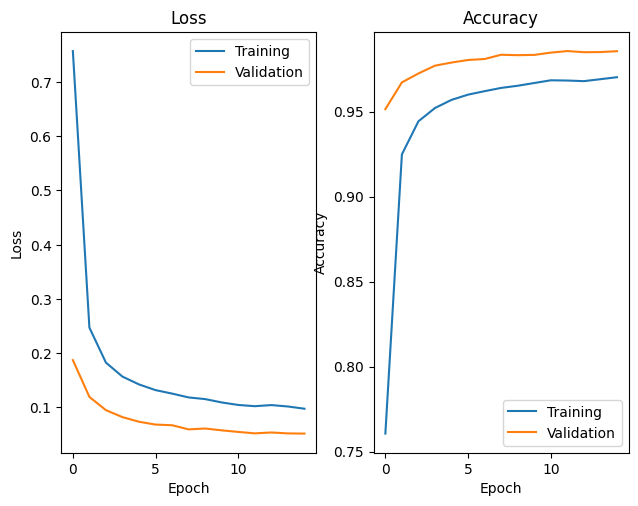

In [ ]:
# Plotting the accuracy and loss values
plot_performance(history_cnn_1)

> The above plot shows that we may have to reduce the value of dropout. The regularization seems a bit too aggressive for these parameters as we can see that the validation data is much higher than training data, which mean that there could be some minor underfitting aswell.

In [ ]:
# Evaluating the model on the test set.
score_cnn_1 = model_cnn_1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_cnn_1[0])
print("Test accuracy:", score_cnn_1[1])

Test loss: 0.04313512519001961
Test accuracy: 0.9864000082015991


> As a starting point, the performances using the test data are already very good compared to the ones with 35k parameters.

### **Building the CNNs: CNN 2 - 5258 Parameters - Improved Dropout to 0.1**

> This model is built following the first CNN, as the model is pretty much identical to the Baseline. The only difference is in the value of the Dropout, which is lowered to 0.1 because of the problems described above.


In [ ]:
# Setting up the input shape
input_shape = (28, 28, 1)
model_cnn_2 = keras.Sequential(
    [
        # Input layer
        keras.Input(shape=input_shape),
        # First Convolutional Layer with 8 filters 3x3, Pooling 2x2
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        # Second Convolutional Layer with 16 filters 3x3, Pooling 2x2
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        # Flatten for the Dense Layer
        layers.Flatten(),
        # Regularization, this time with 0.1
        layers.Dropout(0.1),
        # Dense Output Layer
        layers.Dense(num_classes, activation="softmax"),
    ]
)
# Showing the model summary (for parameters)
model_cnn_2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           4,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,258 (20.54 KB)

 Trainable params: 5,258 (20.54 KB)

 Non-trainable params: 0 (0.00 B)

> Obviously changing the Dropout value does not alter the amount of total parameters.

In [ ]:
# Fixed Values
batch_size = 128
epochs = 15

# Compiling the model
model_cnn_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fitting the model and obtaining its training history for analysis
history_cnn_2 = model_cnn_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.6558 - loss: 1.1452 - val_accuracy: 0.9473 - val_loss: 0.1825
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9429 - loss: 0.1927 - val_accuracy: 0.9670 - val_loss: 0.1168
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9604 - loss: 0.1294 - val_accuracy: 0.9738 - val_loss: 0.0927
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9669 - loss: 0.1044 - val_accuracy: 0.9767 - val_loss: 0.0791
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9718 - loss: 0.0899 - val_accuracy: 0.9789 - val_loss: 0.0686
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9756 - loss: 0.0772 - val_accuracy: 0.9816 - val_loss: 0.0618
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9780 - loss: 0.0706 - val_accuracy: 0.9833 - val_loss: 0.0576
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9792 - loss: 0.0661 - 

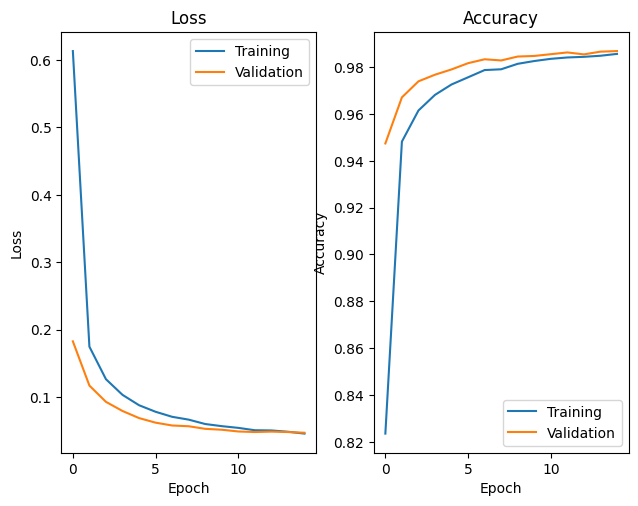

In [ ]:
# Plotting the accuracy and loss values
plot_performance(history_cnn_2)

> The plot above shows indeed a much better fit, with the validation and training performances being very close to each other.

In [ ]:
# Evaluating the model on the test set.
score_cnn_2 = model_cnn_2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_cnn_2[0])
print("Test accuracy:", score_cnn_2[1])

Test loss: 0.040802422910928726
Test accuracy: 0.987500011920929


> The performances with the evaluation are also slightly better, meaning that the changes to the Dropout value have helped the network learn better in training while also improving on unseen data.

### **Building the CNNs: CNN 3 - 5866  Parameters - 5x5 Kernel on Second Layer**

> Once found a better value for the regularization, this model will focus on modifying the kernel size on the second layer. Usually the *3x3 kernel_size* can be considered a good choice since it's a small kernel (which captures a lot of specific information of features) and also our images are not very big, therefore this model will first be modified on just one layer with a sligthly bigger *kernel_size of 5x5*, another size commonly used.  

In [ ]:
# Setting up the input shape
input_shape = (28, 28, 1)
model_cnn_3 = keras.Sequential(
    [
        # Input layer
        keras.Input(shape=input_shape),
        # First Convolutional Layer with 8 filters 3x3, Pooling 2x2
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        # Second Convolutional Layer with 16 filters 5x5, Pooling 2x2
        layers.Conv2D(16, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        # Flatten for the Dense Layer
        layers.Flatten(),
        # Regularization
        layers.Dropout(0.1),
        # Dense Output Layer
        layers.Dense(num_classes, activation="softmax"),
    ]
)
# Showing the model summary (for parameters)
model_cnn_3.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 9, 9, 16)            │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,866 (22.91 KB)

 Trainable params: 5,866 (22.91 KB)

 Non-trainable params: 0 (0.00 B)

> Increasing the *kernel_size* also increases the amount of total parameters, which is now 5866, still within the task request.

In [ ]:
# Fixed Values
batch_size = 128
epochs = 15

# Compiling the model
model_cnn_3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fitting the model and obtaining its training history for analysis
history_cnn_3 = model_cnn_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.6647 - loss: 1.1235 - val_accuracy: 0.9475 - val_loss: 0.1810
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.9380 - loss: 0.2001 - val_accuracy: 0.9662 - val_loss: 0.1125
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.9580 - loss: 0.1330 - val_accuracy: 0.9728 - val_loss: 0.0905
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - accuracy: 0.9675 - loss: 0.1035 - val_accuracy: 0.9782 - val_loss: 0.0745
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.9740 - loss: 0.0859 - val_accuracy: 0.9812 - val_loss: 0.0671
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.9758 - loss: 0.0782 - val_accuracy: 0.9822 - val_loss: 0.0623
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.9779 - loss: 0.0689 - val_accuracy: 0.9831 - val_loss: 0.0585
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.9797 - loss: 0.0637 - 

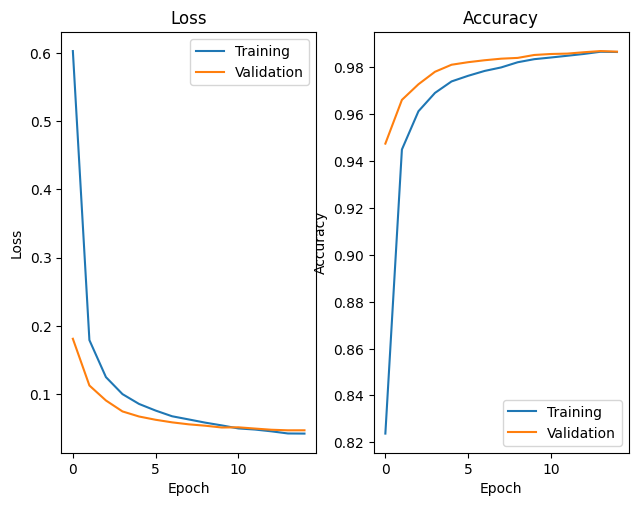

In [ ]:
# Plotting the accuracy and loss values
plot_performance(history_cnn_3)

> We can see another good fit with Dropout to 0.1.

In [ ]:
# Evaluating the model on the test set.
score_cnn_3 = model_cnn_3.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_cnn_3[0])
print("Test accuracy:", score_cnn_3[1])

Test loss: 0.03734233230352402
Test accuracy: 0.9884999990463257


> The performance is slightly better than before, approaching the 99% accuracy target. This suggests that the 5x5 kernel size might be more effective for this type of image and params, offering improved feature extraction with fewer parameters.

### **Building the CNNs: CNN 4 - 5994 Parameters - 5x5 Kernel Size on Both Layers**

> This model will introduce the 5x5 kernel size to the first layer aswell, since the performance gain obtained with the CNN 3.

In [ ]:
# Setting up the input shape
input_shape = (28, 28, 1)
model_cnn_4 = keras.Sequential(
    [
        # Input layer
        keras.Input(shape=input_shape),
        # First Convolutional Layer with 8 filters 5x5, Pooling 2x2
        layers.Conv2D(8, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        # Second Convolutional Layer with 16 filters 5x5, Pooling 2x2
        layers.Conv2D(16, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        # Flatten for the Dense Layer
        layers.Flatten(),
        # Regularization
        layers.Dropout(0.1),
        # Dense Output Layer
        layers.Dense(num_classes, activation="softmax"),
    ]
)
# Showing the model summary (for parameters)
model_cnn_4.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 8)           │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 12, 12, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 16)            │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,994 (23.41 KB)

 Trainable params: 5,994 (23.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fixed Values
batch_size = 128
epochs = 15

# Compiling the model
model_cnn_4.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fitting the model and obtaining its training history for analysis
history_cnn_4 = model_cnn_4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.7058 - loss: 0.9819 - val_accuracy: 0.9592 - val_loss: 0.1387
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.9508 - loss: 0.1581 - val_accuracy: 0.9711 - val_loss: 0.0989
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.9664 - loss: 0.1125 - val_accuracy: 0.9759 - val_loss: 0.0800
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.9719 - loss: 0.0918 - val_accuracy: 0.9784 - val_loss: 0.0699
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.9758 - loss: 0.0772 - val_accuracy: 0.9814 - val_loss: 0.0631
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.9789 - loss: 0.0681 - val_accuracy: 0.9828 - val_loss: 0.0594
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.9807 - loss: 0.0619 - val_accuracy: 0.9834 - val_loss: 0.0557
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.9823 - loss: 0.0563 - 

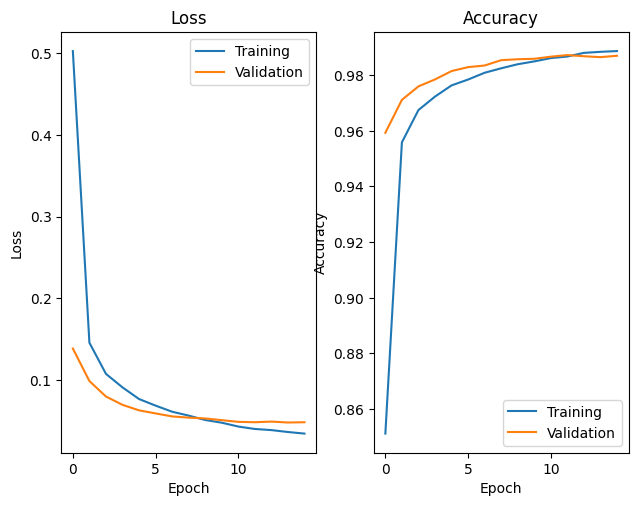

In [ ]:
# Plotting the accuracy and loss values
plot_performance(history_cnn_4)

In [ ]:
# Evaluating the model on the test set.
score_cnn_4 = model_cnn_4.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_cnn_4[0])
print("Test accuracy:", score_cnn_4[1])

Test loss: 0.03496372327208519
Test accuracy: 0.9890000224113464


> The performance slightly increases again, confirming that the 5x5 kernel_size seems to work better with less than 7k parameters, even if there is some minor overfitting present.

### **Building the CNNs: CNN 5 - 6346 Parameters - Experiment with Three Layers**

> Another experiment to improve performance could be editing the amount of layers of the CNN. Having just one layer will increase a lot the parameters so the next possible option is to try increasing the layers to three. This time the kernel_size will be kept 5x5 only for the first layer or the parameters will be too many.


In [ ]:
# Setting up the input shape
input_shape = (28, 28, 1)
model_cnn_5 = keras.Sequential(
    [
        # Input layer
        keras.Input(shape=input_shape),
        # First Convolutional Layer with 8 filters 5x5, Pooling 2x2
        layers.Conv2D(8, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        # Second Convolutional Layer with 16 filters 3x3, Pooling 2x2
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        # Third Convolutional Layer with 32 filters 3x3, Pooling 2x2
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        # Flatten for the Dense Layer
        layers.Flatten(),
        # Regularization
        layers.Dropout(0.1),
        # Dense Output Layer
        layers.Dense(num_classes, activation="softmax"),
    ]
)
# Showing the model summary (for parameters)
model_cnn_5.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 24, 24, 8)           │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 12, 12, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 10, 10, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 3, 3, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,346 (24.79 KB)

 Trainable params: 6,346 (24.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fixed Values
batch_size = 128
epochs = 15

# Compiling the model
model_cnn_5.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fitting the model and obtaining its training history for analysis
history_cnn_5 = model_cnn_5.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.5949 - loss: 1.2548 - val_accuracy: 0.9364 - val_loss: 0.2155
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.9216 - loss: 0.2595 - val_accuracy: 0.9582 - val_loss: 0.1421
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.9416 - loss: 0.1913 - val_accuracy: 0.9637 - val_loss: 0.1242
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - accuracy: 0.9498 - loss: 0.1610 - val_accuracy: 0.9678 - val_loss: 0.1045
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.9574 - loss: 0.1381 - val_accuracy: 0.9714 - val_loss: 0.0933
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - accuracy: 0.9614 - loss: 0.1251 - val_accuracy: 0.9729 - val_loss: 0.0889
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.9648 - loss: 0.1124 - val_accuracy: 0.9760 - val_loss: 0.0768
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.9683 - loss: 0.1030 - 

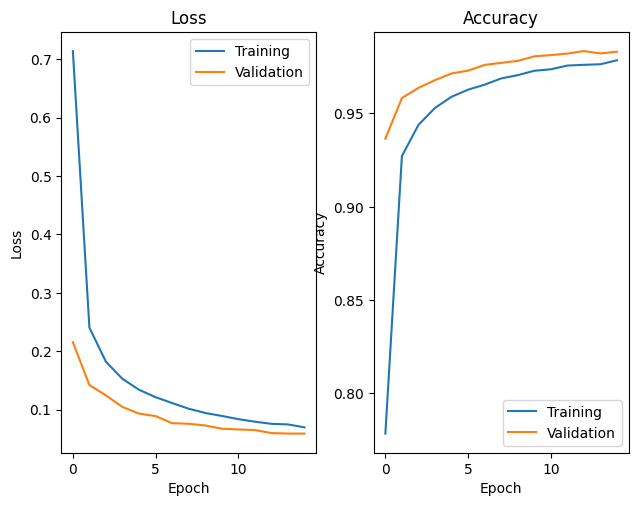

In [ ]:
# Plotting the accuracy and loss values
plot_performance(history_cnn_5)

In [ ]:
# Evaluating the model on the test set.
score_cnn_5 = model_cnn_5.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_cnn_5[0])
print("Test accuracy:", score_cnn_5[1])

Test loss: 0.05734439194202423
Test accuracy: 0.982699990272522


> The performances of the CNN with three layers appear to be worse than those of the CNN with just two layers. Also the total parameters are higher because of the added layer so in this context the CNN with two layers might be the better option, as we can also see some minor underfitting. Using more epochs should probably be a good choice to see an actual improvement with more layers as we see that the curves are still increasing (accuracy) and decreasing (loss) at the last epoch.

## **Final Results and Considerations**

> This section will focus on grouping all the results obtained and compare the performance with the original CNN shown in class, where we have:
- Test loss: 0.02589
- Test accuracy: 0.99119

>  This function prints the loss and accuracy results of every CNN and their total parameters.

In [ ]:
# Function that prints the results of CNNs
def evaluate_models_on_test(models_range, x_test, y_test):
    for i in models_range:
        model_name = f"model_cnn_{i}"
        model = globals()[model_name]

        # Get the number of parameters
        num_params = model.count_params()

        # Evaluate the model
        score = model.evaluate(x_test, y_test, verbose=0)

        # Print model information
        print(f"[{num_params}] Model CNN {i}:")
        print("  Test loss:", score[0])
        print("  Test accuracy:", score[1])
        print("-" * 30)

In [ ]:
# Print the results
evaluate_models_on_test(range(1, 6), x_test, y_test)

[5258] Model CNN 1:
  Test loss: 0.04313512519001961
  Test accuracy: 0.9864000082015991
------------------------------
[5258] Model CNN 2:
  Test loss: 0.040802422910928726
  Test accuracy: 0.987500011920929
------------------------------
[5866] Model CNN 3:
  Test loss: 0.03734233230352402
  Test accuracy: 0.9884999990463257
------------------------------
[5994] Model CNN 4:
  Test loss: 0.03496372327208519
  Test accuracy: 0.9890000224113464
------------------------------
[6346] Model CNN 5:
  Test loss: 0.05734439194202423
  Test accuracy: 0.982699990272522
------------------------------


> The results show a constant improvement (besides the experiment with 3 layers) with just simple changes, like adjusting the **regularization value**, **filters** and **kernel sizes**, but also we see a slight increase in the total parameters, which are still below 7k.

> Not every parameter has been tried while improving the CNN, like for example **padding** and **stride** that were not present in the CNNs shown in class, to keep the amount of CNNs not too high. The **Pool Size** has not been edited from the default value of *2x2* as the image is very small and it would reduce the image too quickly, causing probably underfitting.

> With 5994 parameters the **CNN 4** is definitely a good alternative with much less parameters than the original CNN, reaching very similar performance with much less complexity, but every CNN with just the adjusted value of Dropout is already a valid option.